In [9]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
TRAIN_PATH = './input/'
ipd.Audio(TRAIN_PATH + "test.wav")

In [14]:
sample_rate, audio = wavfile.read(TRAIN_PATH + "test.wav")
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 44100Hz
Audio duration: 10.031020408163265s


In [15]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

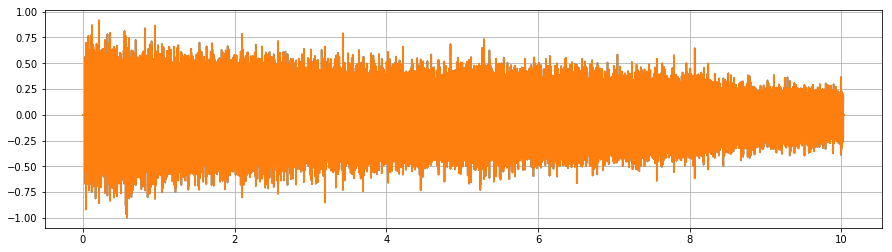

In [16]:
audio = normalize_audio(audio)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

In [22]:
def frame_audio(audio, FFT_size=2048, hop_size=100, sample_rate=44100):
    # hop_size in ms
    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames

In [23]:
hop_size = 100 #ms
FFT_size = 2048

audio_framed = frame_audio(audio, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate)
print("Framed audio shape: {0}".format(audio_framed.shape))

MemoryError: 

In [24]:
import librosa
import librosa.display
import IPython.display

In [27]:
audio_path = './input/test.wav'
y, sr = librosa.load(audio_path)

In [28]:
IPython.display.Audio(data=y, rate=sr)

C:\Users\ajou\Anaconda3\lib\site-packages\librosa\core\spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


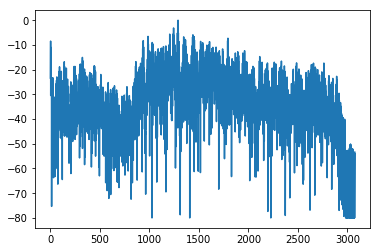

In [29]:
D = librosa.amplitude_to_db(librosa.stft(y[:1024]), ref=np.max)

plt.plot(D.flatten())
plt.show()

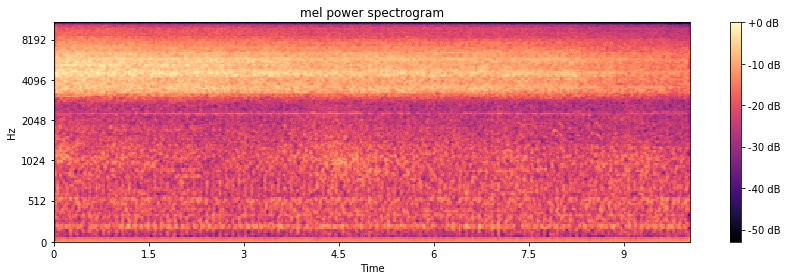

In [37]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

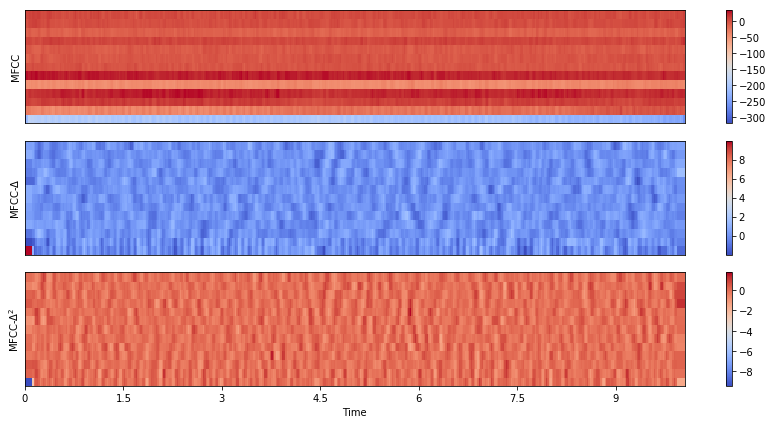

In [38]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()
plt.show()

In [39]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

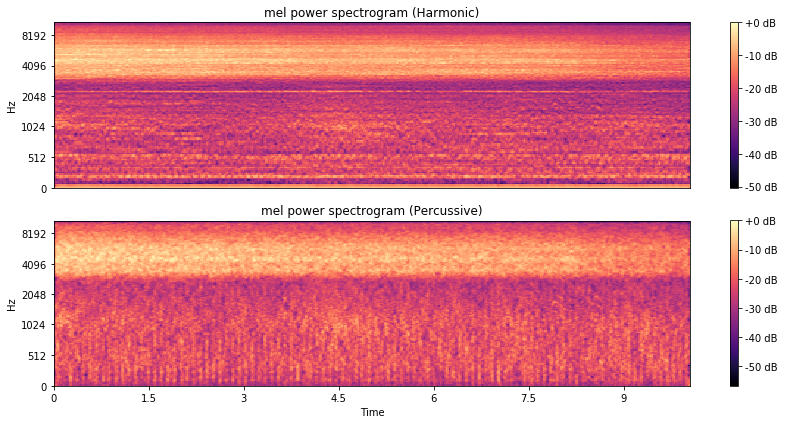

In [41]:
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')
plt.title('mel power spectrogram (Harmonic)')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram (Percussive)')
plt.colorbar(format='%+02.0f dB')

plt.tight_layout()
plt.show()

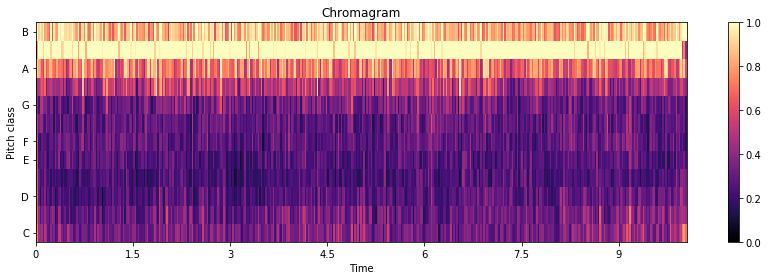

In [42]:
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

plt.figure(figsize=(12, 4))
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()
plt.show()

In [44]:
delta_mfcc[:, 0]

array([ 9.94441711, -1.92852104, -0.82561781,  0.80904308,  0.37167657,
        0.49529817,  0.83646508,  0.85687217, -1.23554309, -0.6741464 ,
       -0.47818046,  0.91564798,  0.48451558])

In [45]:
delta2_mfcc[:, 0]

array([-9.43024969,  0.28222462,  0.52268845, -0.19405907,  0.15595378,
        0.07721653, -0.55057068, -0.8338913 , -0.18506861,  0.49330352,
        0.30650615, -0.42277523,  0.04085804])

In [46]:
mfcc[:, 0]

array([-318.2046523 ,  -20.47215112,   13.84649779,   11.34732287,
        -40.53720224,   29.31357958,   -7.46965443,  -11.45772536,
         -3.0717375 ,   12.75433247,   -3.91533165,    4.9779379 ,
          9.15887138])